In [1]:
import tensorflow as tf

In [27]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data()

In [28]:
X_train = X_train.reshape(-1,28*28) / 255
X_test = X_test.reshape(-1,28*28) / 255

# autoencoder

In [189]:
input_ = tf.keras.Input((28*28,)) # representaion bottleneck

## encoder

In [190]:
x = tf.keras.layers.Dense(512, activation='relu')(input_)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

## decoder

In [191]:
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(784, activation='sigmoid')(x)

In [192]:
autoencoder = tf.keras.Model(input_, x)

In [193]:
autoencoder.compile(loss=tf.keras.losses.BinaryCrossentropy())
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1596
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1231
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1141
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1094
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1064
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1042
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1026
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1013
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1002
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0993
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0986
Epoch 12/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0980
E


KeyboardInterrupt



In [35]:
result = autoencoder(X_test)

# expert

In [225]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data()

In [241]:
X_train = X_train / 255
X_test = X_test / 255

In [254]:
X_train_noise = X_train + tf.random.normal((28,28))/10

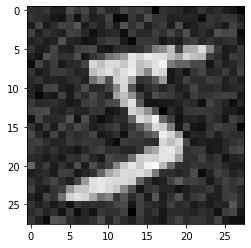

In [255]:
plt.imshow(X_train_noise[0], cmap='gray')

In [264]:
class AE(tf.keras.Model):
    def __init__(self, latent_dim):
        super().__init__(self)
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(self.latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(28*28, activation='sigmoid'),
            tf.keras.layers.Reshape((28,28))
        ])
        
    def call(self, x):
        x = self.encoder(x)
        return self.decoder(x)
#         return 

In [265]:
ae = AE(32)

In [266]:
ae.compile(loss=tf.keras.losses.MSE)

# model (mse, sigmoid)
# compile (loss)

In [267]:
ae.fit(X_train_noise,X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0114
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0087
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0081
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0077
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0075
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0070


In [268]:
result = ae(X_train_noise)

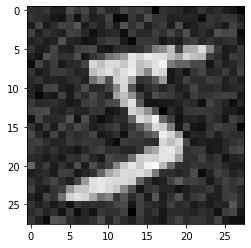

In [262]:
plt.imshow(X_train_noise[0], cmap='gray')

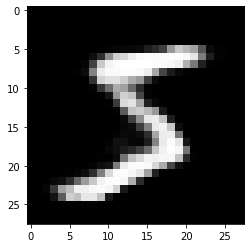

In [269]:
plt.imshow(result[0], cmap='gray')

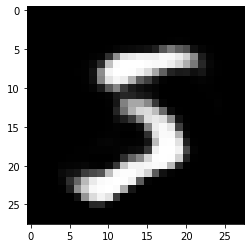

In [263]:
plt.imshow(result[0], cmap='gray')

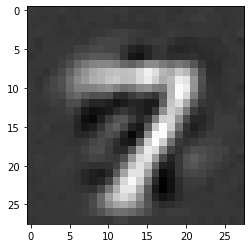

In [215]:
plt.imshow(result[0], cmap='gray') # mse

In [198]:
ae.decoder

In [37]:
import matplotlib.pyplot as plt

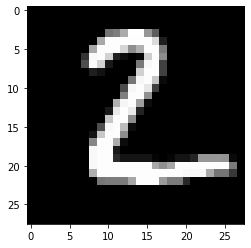

In [43]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')

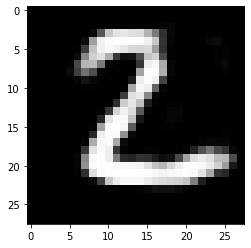

In [44]:
plt.imshow(result[1].numpy().reshape(28,28), cmap='gray')

# regularizer

In [86]:
import numpy as np

In [175]:
aa = np.array([[1,2,3],
               [4,5,6]])

In [176]:
layer = tf.keras.layers.Dense(1, activation='relu', kernel_regularizer=tf.keras.regularizers.L1())

In [177]:
layer.weights

[]

In [178]:
layer(aa)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.0031571],
       [3.252214 ]], dtype=float32)>

In [179]:
layer.weights

[<tf.Variable 'dense_34/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.01702106],
        [ 1.2118572 ],
        [-0.47919273]], dtype=float32)>,
 <tf.Variable 'dense_34/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [180]:
np.sum(aa[0]*layer.weights[0].numpy().T)

1.0031572580337524

In [181]:
layer.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=0.01708071>]

In [184]:
tf.reduce_sum(tf.abs(layer.weights[0]) * 0.01)

<tf.Tensor: shape=(), dtype=float32, numpy=0.01708071>

In [141]:
regulizer = tf.keras.regularizers.L1()

In [145]:
dir(regulizer)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'from_config',
 'get_config',
 'l1']

# DCAE : Deep Convolution AE

In [406]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1) / 255
X_test = X_train.reshape(-1, 28,28,1) / 255

In [407]:
input_ = tf.keras.Input((28,28,1))

In [408]:
x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(input_)
x = tf.keras.layers.MaxPool2D(padding='same')(x)
x = tf.keras.layers.Conv2D(32,3, padding='same', activation='relu')(x)
x = tf.keras.layers.UpSampling2D()(x)
x = tf.keras.layers.Conv2D(1,3, padding='same', activation='sigmoid')(x)

In [409]:
model = tf.keras.Model(input_, x)

In [410]:
model.compile(loss=tf.keras.losses.MeanSquaredError())

In [411]:
model.fit(X_train,X_train, epochs=10, validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0038 - val_loss: 5.8247e-06
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 9.2402e-04 - val_loss: 2.3395e-06
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 6.5560e-04 - val_loss: 1.8190e-06
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 5.2118e-04

KeyboardInterrupt: 

In [402]:
result = model(X_test)

In [405]:
result[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[2.2754206e-05],
        [1.7138555e-08],
        [1.9090253e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [3.5688085e-08],
        [4.9923177e-08],
        [1.3634583e-07],
        [1.2246270e-06]],

       [[8.8180019e-07],
        [9.5685770e-10],
        [1.0307753e-08],
        [6.6876495e-08],
        [6.6876240e-08],
        [6.6880453e-08],
        [6.6881860e-08],
        [6.6899460e-08],
        [6.6886699e-08],
        [6.6881725e-

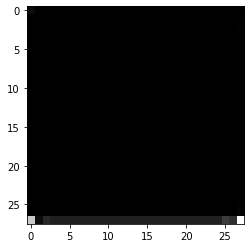

In [404]:
plt.imshow(result[0], cmap='gray')

# type1

In [ ]:
단순 계산으로 크게 

In [284]:
import numpy as np

In [285]:
a = np.array([[1,2],[3,4]])

In [288]:
a

array([[1, 2],
       [3, 4]])

In [286]:
x = np.tile(a, (2,2))

In [ ]:
np.repeat(a, 2)

In [295]:
a.repeat(2, axis=0).repeat(2,axis=1)

array([[1, 1, 2, 2],
       [1, 1, 2, 2],
       [3, 3, 4, 4],
       [3, 3, 4, 4]])

In [344]:
up = tf.keras.layers.UpSampling2D((2.6,1))

In [345]:
a4 = a.reshape(1,2,2,1)

In [346]:
up(a4)

<tf.Tensor: shape=(1, 4, 2, 1), dtype=int32, numpy=
array([[[[1],
         [2]],

        [[1],
         [2]],

        [[3],
         [4]],

        [[3],
         [4]]]])>

# type2

In [282]:
model = tf.keras.Model(input_, x)

In [283]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 1)         577       
                                                                 
Total params: 19,393
Trainable params: 19,393
Non-trainable params: 0
_________________________________________________________________
